In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
# Reading in the season stats file
df = pd.read_csv("Seasons_Stats.csv")

# Viewing the top 5 entries
df.head()

,Year,Player,Pos,Age,Tm,G,GS,MP,PER,TS%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1950,Curly Armstrong,G-F,31.0,FTW,63,NaN,NaN,NaN,0.368,...,0.705,NaN,NaN,NaN,176,NaN,NaN,NaN,217,458
1,1950,Cliff Barker,SG,29.0,INO,49,NaN,NaN,NaN,0.435,...,0.708,NaN,NaN,NaN,109,NaN,NaN,NaN,99,279
2,1950,Leo Barnhorst,SF,25.0,CHS,67,NaN,NaN,NaN,0.394,...,0.698,NaN,NaN,NaN,140,NaN,NaN,NaN,192,438
3,1950,Ed Bartels,F,24.0,TOT,15,NaN,NaN,NaN,0.312,...,0.559,NaN,NaN,NaN,20,NaN,NaN,NaN,29,63
4,1950,Ed Bartels,F,24.0,DNN,13,NaN,NaN,NaN,0.308,...,0.548,NaN,NaN,NaN,20,NaN,NaN,NaN,27,59


In [5]:
# Filling in 0 for missing values

df.fillna(0, inplace=True)

# By Year Analysis

In [19]:
### Function that generates a plot with two variables

def plot_avg(x, y, kind, title):
    temp = df.groupby(x)[y].mean()
    temp.plot(kind=kind, title=title, figsize=(12,12))

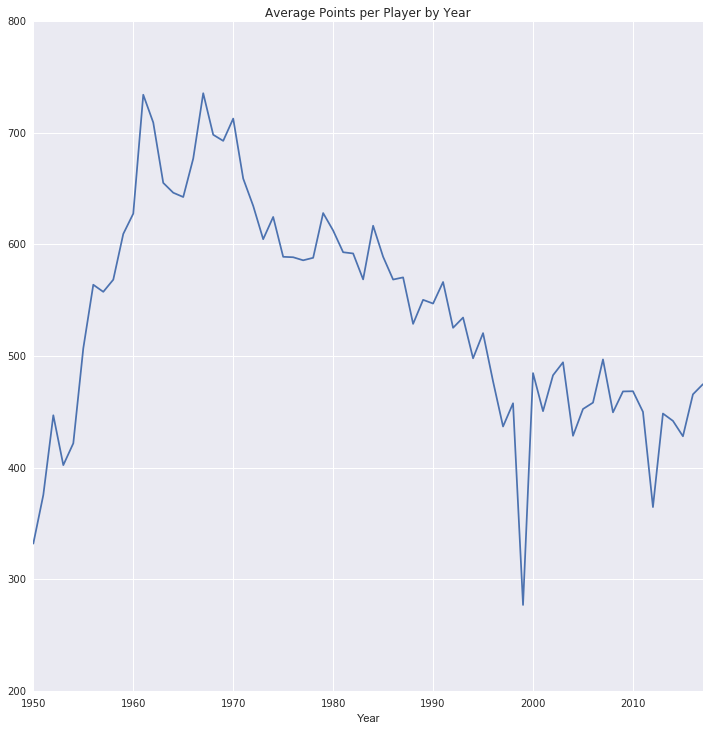

In [20]:
### Plotting average points per player by Year

plot_avg(x='Year', y='PTS', kind='line', title='Average Points per Player by Year')

Based on this graph, players scored a lot more per year from 1960-1990 then the present time (2011-2017).

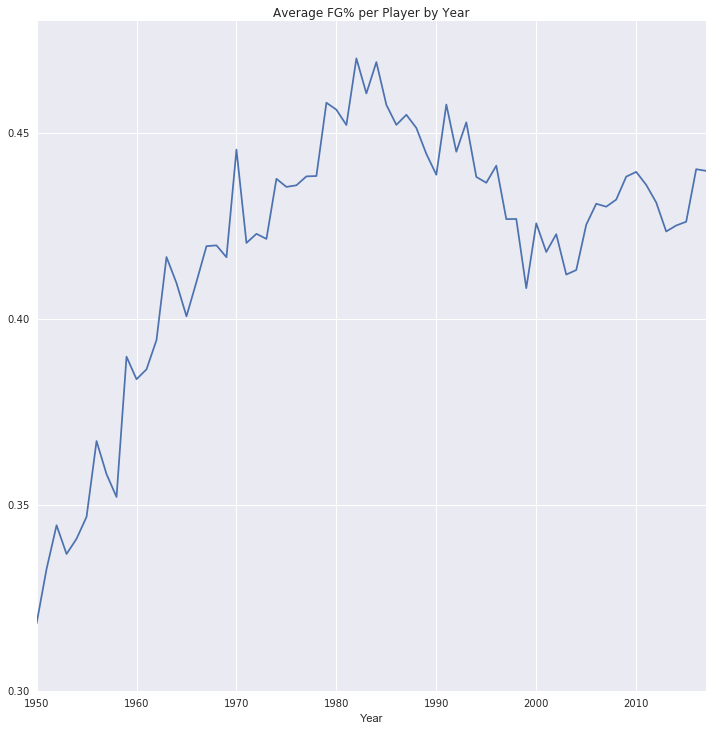

In [23]:
### Plotting average minutes per game

plot_avg(x='Year', y='FG%', kind='line', title='Average FG% per Player by Year')

# Player Analysis

In [62]:
### Function to plot based on player stats

def player(y, agg, kind, title):
    temp = df.groupby('Player')[y].agg(agg).order()
    temp[-10:,].plot(kind=kind, title=title, figsize=(12,12))

In [97]:
### Function that calculates average per year

def avg(category):
    temp = df.groupby('Player', 'G')[category].agg({"AVG":"mean"})
    temp['pergame'] = temp['AVG']/temp['G']
    return temp.sort('pergame', ascending=False)

In [99]:
#df.groupby('Player')['PTS'].agg({"AVG":"mean"})

ValueError: No axis named G for object type <class 'pandas.core.frame.DataFrame'>

In [98]:
avg('PTS')

ValueError: No axis named G for object type <class 'pandas.core.frame.DataFrame'>

/Users/tqrahman/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:4: FutureWarning: order is deprecated, use sort_values(...)


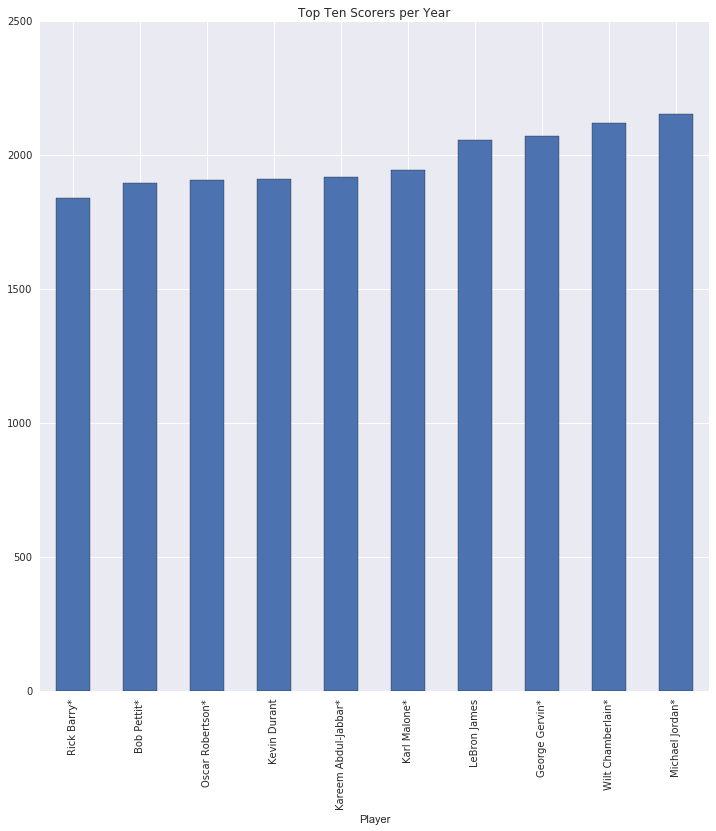

In [64]:
### Plotting top season scorers on average

player(y='PTS', agg='mean', kind='bar', title='Top Ten Scorers per Year')

/Users/tqrahman/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:4: FutureWarning: order is deprecated, use sort_values(...)


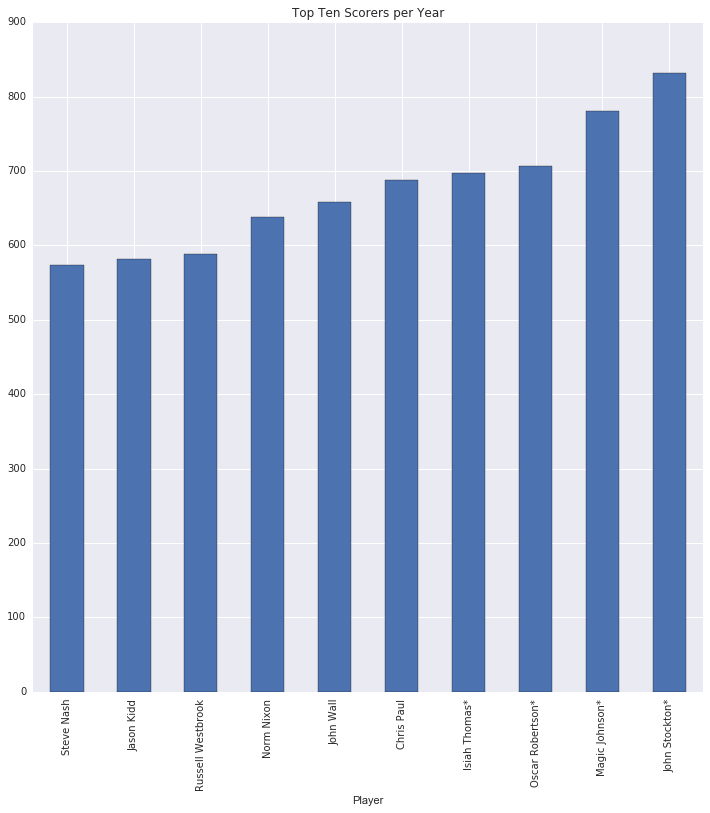

In [65]:
### Plotting top assists per season

player(y='AST', agg='mean', kind='bar', title='Top Ten Scorers per Year')